# Dataset-1 (E - Car Data )

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
df1=pd.read_csv('ElectricCarData.csv')

In [3]:
df1.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB


In [5]:
df1.describe()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,Seats,PriceEuro
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.396117,179.194175,338.786408,189.165049,4.883495,55811.563107
std,3.017430,43.573030,126.014444,29.566839,0.795834,34134.665280
min,2.100000,123.000000,95.000000,104.000000,2.000000,20129.000000
25%,5.100000,150.000000,250.000000,168.000000,5.000000,34429.500000
50%,7.300000,160.000000,340.000000,180.000000,5.000000,45000.000000
75%,9.000000,200.000000,400.000000,203.000000,5.000000,65000.000000
max,22.400000,410.000000,970.000000,273.000000,7.000000,215000.000000


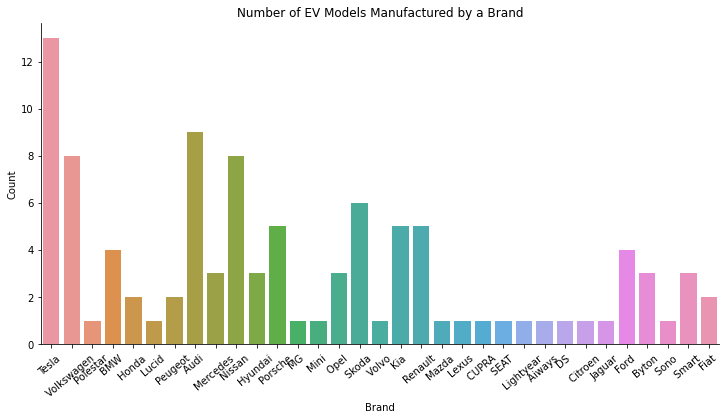

In [6]:
# brand-wise count of EV models
sns.catplot(data=df1, x='Brand', kind='count', aspect=2)
plt.tick_params(axis='x', rotation=40)
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Number of EV Models Manufactured by a Brand')
plt.show()

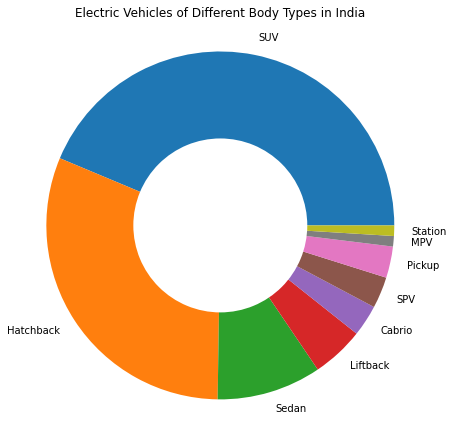

In [7]:
# different body types EVs visualization from dataset 1
x = df1['BodyStyle'].value_counts().plot.pie(radius=2)
plt.pie(x=[1], colors='white')
plt.title(label='Electric Vehicles of Different Body Types in India', pad=100)
plt.ylabel('')
plt.show()

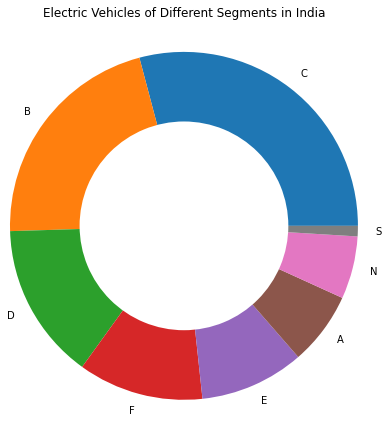

In [8]:
# analysis of different segments of EVs from dataset 1
x = df1['Segment'].value_counts().plot.pie(radius=2)
plt.pie(x=[1], radius=1.2, colors='white')
plt.title(label='Electric Vehicles of Different Segments in India', pad=100)
plt.ylabel('')
plt.show()

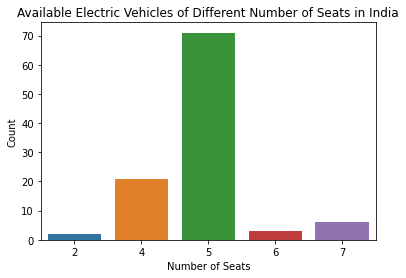

In [9]:
# EVs of different number of seats from dataset 1
sns.countplot(data=df1, x='Seats')
plt.xlabel('Number of Seats')
plt.ylabel('Count')
plt.title(label='Available Electric Vehicles of Different Number of Seats in India')
plt.show()

Text(0.5, 1.0, 'Brand-wise Analysis of the Number of Seats')

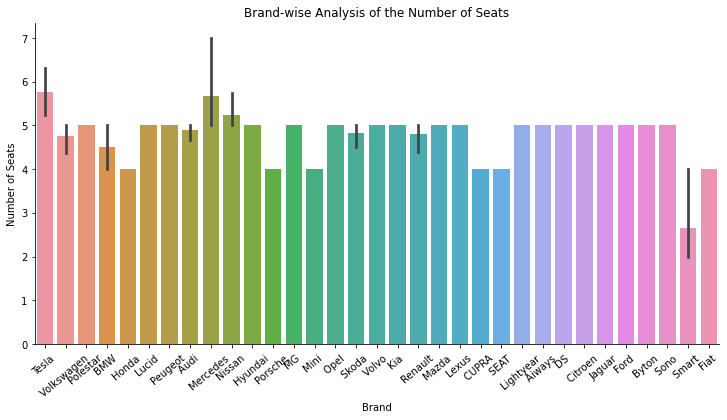

In [10]:
# brand-wise analysis of the number of seats
sns.catplot(kind='bar', data=df1, x='Brand', y='Seats',aspect=2)
plt.tick_params(axis='x', rotation=40)
plt.xlabel('Brand')
plt.ylabel('Number of Seats')
plt.title('Brand-wise Analysis of the Number of Seats')

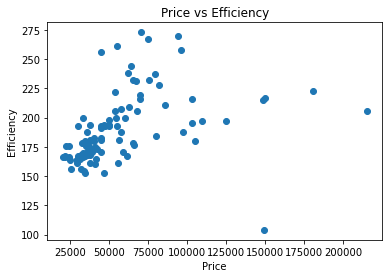

In [11]:
#scatter plot for knowing the relation between price and efficiency
plt.scatter(df1['PriceEuro'], df1['Efficiency_WhKm'])
plt.xlabel('Price')
plt.ylabel('Efficiency')
plt.title('Price vs Efficiency')
plt.show()

Text(0.5, 1.0, 'Price Comparison')

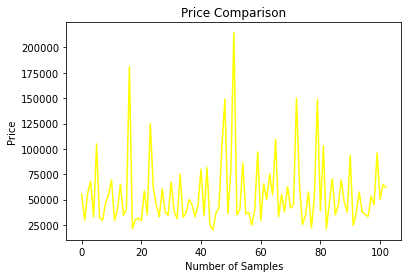

In [12]:
# plotting the price from dataset 1
plt.plot(df1['PriceEuro'], color='Yellow')
plt.xlabel('Number of Samples')
plt.ylabel('Price')
plt.title('Price Comparison')

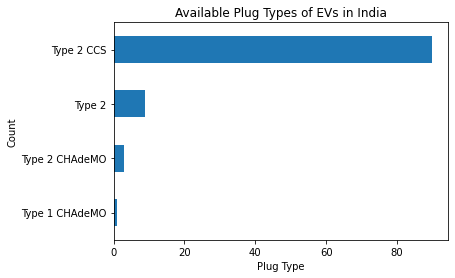

In [13]:
# plug types visualization from dataset 1
df1['PlugType'].value_counts().sort_values(ascending=True).plot.barh()
plt.xlabel('Plug Type')
plt.ylabel('Count')
plt.title('Available Plug Types of EVs in India')
plt.show()

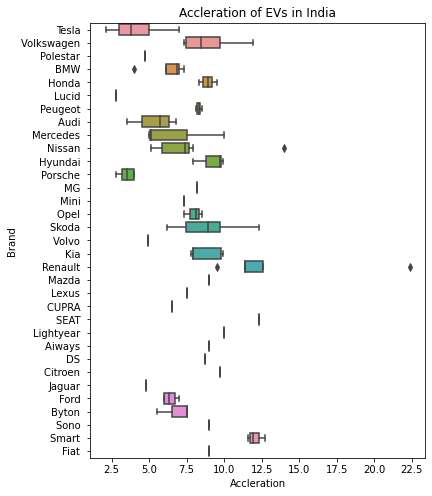

In [14]:
# accleration visualization from dataset 1
plt.figure(figsize=(6, 8))
sns.boxplot(data=df1, x='AccelSec', y='Brand')
plt.xlabel('Accleration')
plt.ylabel('Brand')
plt.title(label='Accleration of EVs in India')
plt.show()

Text(0.5, 1.0, 'Brand-wise Analysis of the Range Parameter')

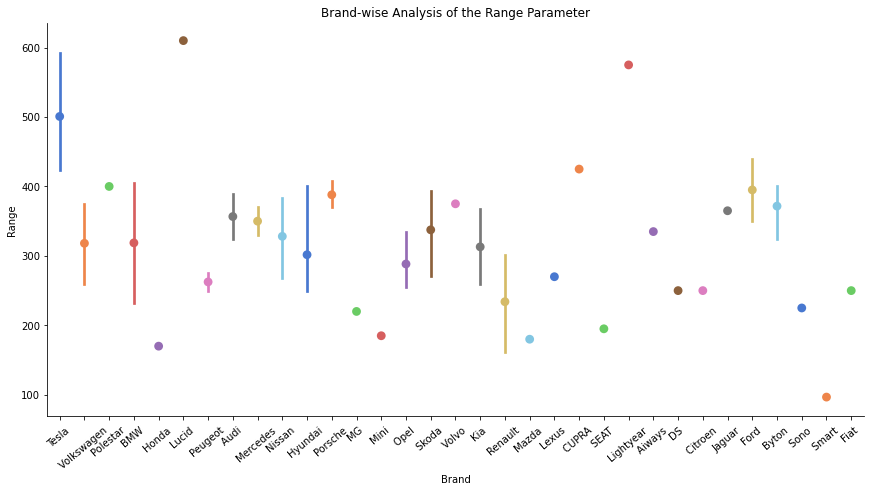

In [15]:
# brand-wise analysis of the range parameter
sns.catplot(kind='point', data=df1, x='Brand', y='Range_Km', palette='muted', height=6, aspect=2)
plt.tick_params(axis='x', rotation=40)
plt.xlabel('Brand')
plt.ylabel('Range')
plt.title('Brand-wise Analysis of the Range Parameter')

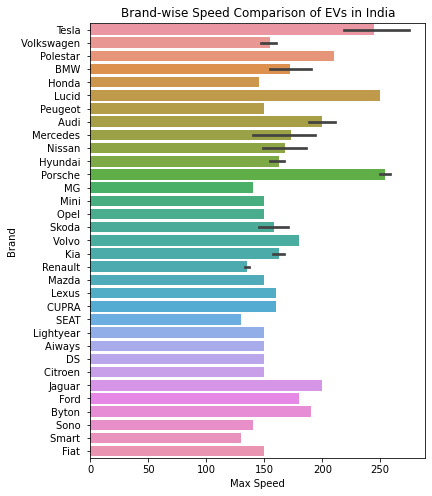

In [16]:
# speed visualization from dataset 1
plt.figure(figsize=(6, 8))
sns.barplot(data=df1, x='TopSpeed_KmH', y='Brand')
plt.xlabel('Max Speed')
plt.ylabel('Brand')
plt.title(label='Brand-wise Speed Comparison of EVs in India')
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

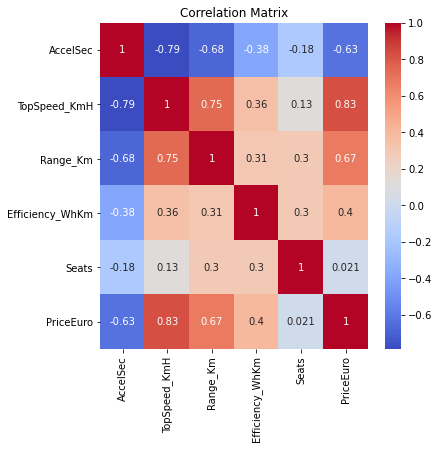

In [17]:
# plotting the correlation matrix from dataset 1
plt.figure(figsize=(6,6))
sns.heatmap(data=df1.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

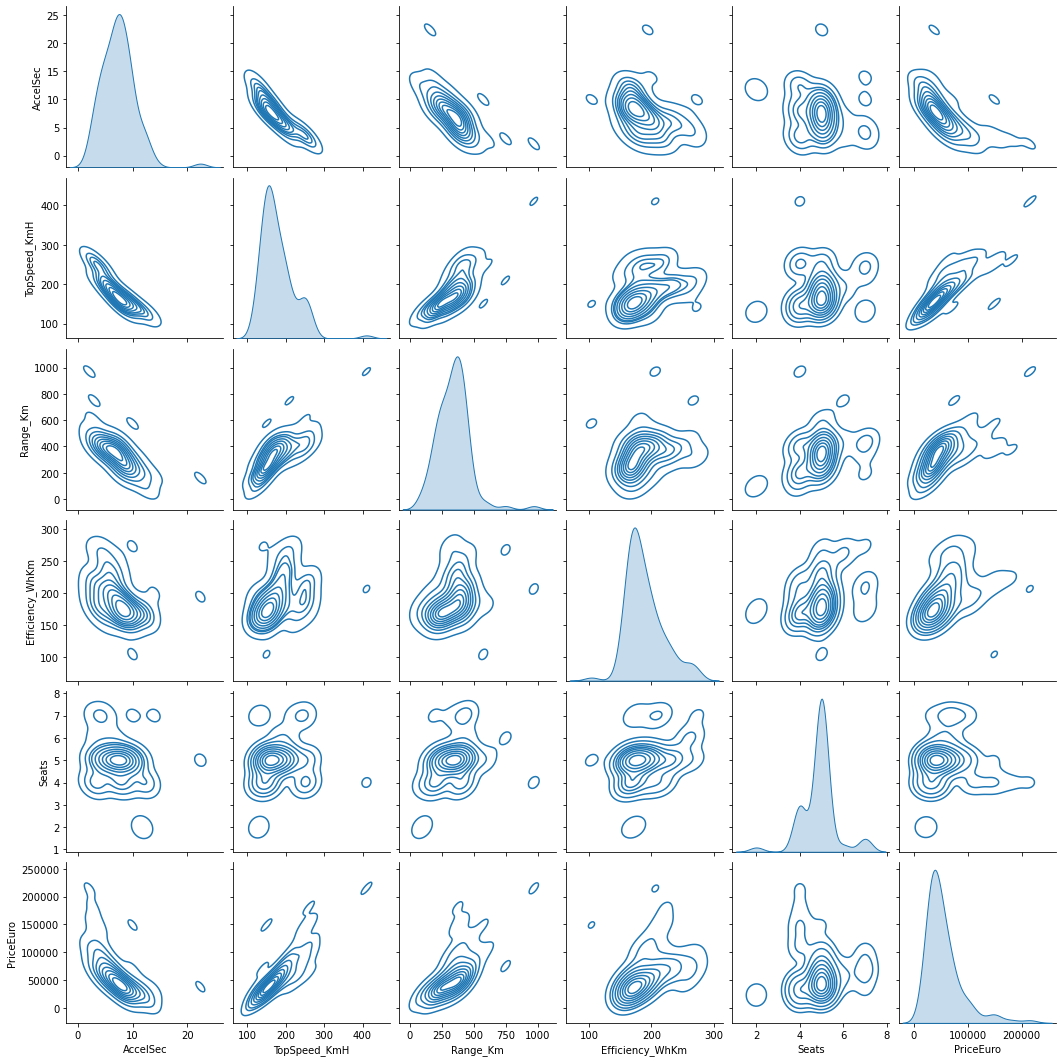

In [18]:
sns.pairplot(df1, kind='kde')

In [19]:
# encoding the categorical features
import numpy as np
# PowerTrain feature
df1['PowerTrain'] = df1['PowerTrain'].replace('RWD', 0)
df1['PowerTrain'] = df1['PowerTrain'].replace('FWD', 1)
df1['PowerTrain'] = df1['PowerTrain'].replace('AWD', 2)


# RapidCharge feature
df1['RapidCharge'] = np.where(df1['RapidCharge'] == 'N0', 0, 1)

#plug type feature
df1['PlugType'] = df1['PlugType'].replace('Type 2 CCS', 0)
df1['PlugType'] = df1['PlugType'].replace('Type 2', 1)
df1['PlugType'] = df1['PlugType'].replace('Type 1 CHAdeMO', 2)
df1['PlugType'] = df1['PlugType'].replace('Type 2 CHAdeMO', 3)

#Body Style Features
df1['BodyStyle'] = df1['BodyStyle'].replace('SUV', 0)
df1['BodyStyle'] = df1['BodyStyle'].replace('Sedan', 1)
df1['BodyStyle'] = df1['BodyStyle'].replace('Hatchback', 2)
df1['BodyStyle'] = df1['BodyStyle'].replace('Liftback', 3)
df1['BodyStyle'] = df1['BodyStyle'].replace('Pickup', 4)
df1['BodyStyle'] = df1['BodyStyle'].replace('MPV', 5)
df1['BodyStyle'] = df1['BodyStyle'].replace('Cabrio', 6)
df1['BodyStyle'] = df1['BodyStyle'].replace('SPV', 7)
df1['BodyStyle'] = df1['BodyStyle'].replace('Station', 8)

#Segment Features
df1['Segment'] = df1['Segment'].replace('A', 0)
df1['Segment'] = df1['Segment'].replace('B', 1)
df1['Segment'] = df1['Segment'].replace('C', 2)
df1['Segment'] = df1['Segment'].replace('D', 3)
df1['Segment'] = df1['Segment'].replace('E', 4)
df1['Segment'] = df1['Segment'].replace('F', 5)
df1['Segment'] = df1['Segment'].replace('N', 6)
df1['Segment'] = df1['Segment'].replace('S', 7)

In [20]:
# selecting features for building a model
df1 = df1.replace('-', 0) #Inorder to convert string to float
df1 = df1.dropna()
DF_x=df1.iloc[:, 2:14]
X = df1[['AccelSec','TopSpeed_KmH','Efficiency_WhKm','FastCharge_KmH', 'Range_Km', 'RapidCharge', 'Seats', 'PriceEuro','PowerTrain']]

In [21]:
# feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
# applying Principle Component Analysis (PCA)
pca = PCA(n_components=9)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9'])
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,2.320731,-0.699856,-1.467814,-0.762418,-0.852829,0.107768,0.963562,-0.596837,-4.275997e-17
1,-2.032823,-0.011173,-0.683687,0.544826,0.378508,-0.352072,-0.285682,-0.217434,-2.241145e-17
2,1.508148,-0.153956,-0.427332,-0.712491,-0.665404,0.190228,0.052361,-0.233873,-3.554678e-17
3,0.210891,-0.062747,-0.275736,1.607412,0.183760,-0.410909,0.233644,0.274760,6.176835e-17
4,-2.676873,-0.918330,0.242944,0.490193,-0.147755,-0.416208,-0.216688,0.059650,8.599656e-17


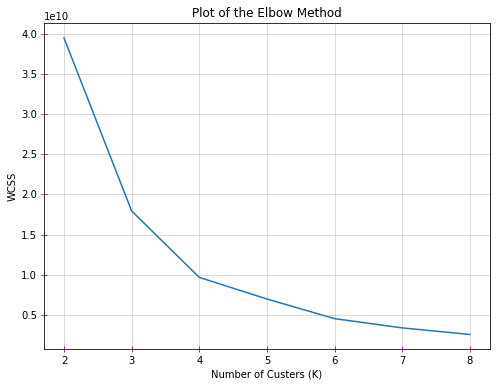

In [23]:
# plotting the results of Elbow

wcss = []

for i in range(2, 9):
    kmean = KMeans(n_clusters=i, init='k-means++', random_state=1234)
    kmean.fit(DF_x)
    wcss.append(kmean.inertia_)

plt.figure(figsize=(8,6))
plt.title('Plot of the Elbow Method')
plt.plot(range(2, 9), wcss)
plt.xticks(range(2, 9))
plt.xlabel('Number of Custers (K)')
plt.ylabel('WCSS')
plt.grid()
plt.tick_params(axis='both', direction='inout', length=6, color='purple', grid_color='lightgray', grid_linestyle='-')
plt.show()

In [24]:
# training the model using k=4 as rendered by the above plot
kmean = KMeans(n_clusters=4, init='k-means++', random_state=1234)
kmean.fit(DF_x)

KMeans(n_clusters=4, random_state=1234)

In [25]:
# check the labels assigned to each data point
print(kmean.labels_)

[3 1 3 3 1 0 1 1 1 3 3 1 1 3 1 1 2 1 1 1 1 3 1 0 3 1 1 3 1 1 3 1 1 3 1 1 3
 1 1 1 0 1 0 1 1 1 1 0 2 1 0 2 1 1 0 1 1 1 1 0 1 3 3 3 3 0 1 3 1 3 1 1 2 3
 1 1 3 1 3 2 1 0 1 1 3 1 1 3 1 1 0 1 1 3 1 1 1 3 1 0 3 3 3]


In [26]:
# check the size of clusters
pd.Series(kmean.labels_).value_counts()

1    58
3    28
0    12
2     5
dtype: int64

In [27]:
# adding a new feature of cluster labels to the dataset 1
df1['clusters'] = kmean.labels_

In [81]:
df_pca=df_pca[:99]

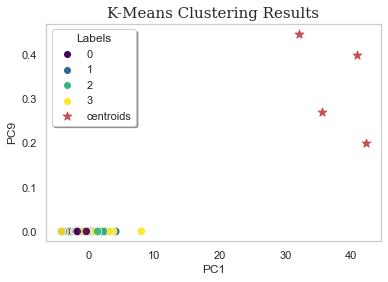

In [98]:
# visualizing clusters
sns.scatterplot(data=df_pca, x='PC1', y='PC9', s=70, hue=kmean.labels_, palette='viridis', zorder=2, alpha=.9)
plt.scatter(x=kmean.cluster_centers_[:, 0], y=kmean.cluster_centers_[:, 1], marker="*", c="r", s=80, label="centroids")
plt.xlabel('PC1')
plt.ylabel('PC9')
plt.grid()
plt.tick_params(grid_color='lightgray', grid_linestyle='-', zorder=1)
plt.legend(title='Labels', fancybox=True, shadow=True)
plt.title('K-Means Clustering Results', family='serif', size=15)
plt.show()

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [31]:
# Feature selection for performance data
X_performance = df1[['Range_Km', 'AccelSec', 'TopSpeed_KmH', 'FastCharge_KmH']]
y_performance = df1['Efficiency_WhKm']

# Split the performance data into training and testing sets
X_performance_train, X_performance_test, y_performance_train, y_performance_test = train_test_split(X_performance, y_performance, test_size=0.2, random_state=42)


In [32]:
# Train a Linear Regression model on performance data
linear_model_perf = LinearRegression()
linear_model_perf.fit(X_performance_train, y_performance_train)

LinearRegression()

In [33]:
# Model evaluation for performance data - Linear Regression
y_performance_pred_linear = linear_model_perf.predict(X_performance_test)
performance_mse_linear = mean_squared_error(y_performance_test, y_performance_pred_linear)
print('Performance Linear Regression Model Mean Squared Error:', performance_mse_linear)


Performance Linear Regression Model Mean Squared Error: 1154.1438613064258


In [34]:
# Train a Decision Tree Regressor on performance data
decision_tree_model_perf = DecisionTreeRegressor(random_state=42)
decision_tree_model_perf.fit(X_performance_train, y_performance_train)

DecisionTreeRegressor(random_state=42)

In [35]:
# Model evaluation for performance data - Decision Tree
y_performance_pred_dt = decision_tree_model_perf.predict(X_performance_test)
performance_mse_dt = mean_squared_error(y_performance_test, y_performance_pred_dt)
print('Performance Decision Tree Model Mean Squared Error:', performance_mse_dt)

Performance Decision Tree Model Mean Squared Error: 979.952380952381


In [36]:
# Train a Random Forest Regressor on performance data
random_forest_model_perf = RandomForestRegressor(random_state=42)
random_forest_model_perf.fit(X_performance_train, y_performance_train)

RandomForestRegressor(random_state=42)

In [37]:
# Model evaluation for performance data - Random Forest
y_performance_pred_rf = random_forest_model_perf.predict(X_performance_test)
performance_mse_rf = mean_squared_error(y_performance_test, y_performance_pred_rf)
print('Performance Random Forest Model Mean Squared Error:', performance_mse_rf)

Performance Random Forest Model Mean Squared Error: 1061.9197523809526


In [38]:
from sklearn.naive_bayes import GaussianNB  
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn import metrics

In [39]:
knn = KNeighborsClassifier()
rfc = RandomForestClassifier()
svc = SVC()
dt_clf=DecisionTreeClassifier()
nb_clf=GaussianNB()

  
# making predictions on the training set
for clf in (rfc, knn, svc,dt_clf,nb_clf):
    clf.fit(X_performance_train, y_performance_train)
    y_pred = clf.predict(X_performance_train)
    print("Accuracy score of ", clf.__class__.__name__, "=",100*metrics.accuracy_score(y_performance_train, y_pred))

Accuracy score of  RandomForestClassifier = 100.0
Accuracy score of  KNeighborsClassifier = 40.243902439024396
Accuracy score of 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


 SVC = 17.073170731707318
Accuracy score of  DecisionTreeClassifier = 100.0
Accuracy score of  GaussianNB = 63.41463414634146


In [40]:
for clf in (rfc, knn, svc,dt_clf,nb_clf):
    clf.fit(X_performance_train, y_performance_train)
    y_pred = clf.predict(X_performance_test)
    print("Accuracy score of ",
          clf.__class__.__name__,"=", 100*metrics.accuracy_score(y_performance_test, y_pred))
    print(confusion_matrix(y_performance_test, y_pred))
    print(classification_report(y_performance_test, y_pred))

Accuracy score of  RandomForestClassifier = 14.285714285714285
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken wil

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Dataset - 2 (Behaviour Study)

In [41]:
df2= pd.read_csv('behaviour study.csv')

In [42]:
df2.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


In [43]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marrital Status   99 non-null     object
 3   Education         99 non-null     object
 4   No of Dependents  99 non-null     int64 
 5   Personal loan     99 non-null     object
 6   House Loan        99 non-null     object
 7   Wife Working      99 non-null     object
 8   Salary            99 non-null     int64 
 9   Wife Salary       99 non-null     int64 
 10  Total Salary      99 non-null     int64 
 11  Make              99 non-null     object
 12  Price             99 non-null     int64 
dtypes: int64(6), object(7)
memory usage: 10.2+ KB


In [44]:
df2.describe()

,Age,No of Dependents,Salary,Wife Salary,Total Salary,Price
count,99.000000,99.000000,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01
mean,36.313131,2.181818,1.736364e+06,5.343434e+05,2.270707e+06,1.194040e+06
std,6.246054,1.335265,6.736217e+05,6.054450e+05,1.050777e+06,4.376955e+05
min,26.000000,0.000000,2.000000e+05,0.000000e+00,2.000000e+05,1.100000e+05
25%,31.000000,2.000000,1.300000e+06,0.000000e+00,1.550000e+06,8.000000e+05
50%,36.000000,2.000000,1.600000e+06,5.000000e+05,2.100000e+06,1.200000e+06
75%,41.000000,3.000000,2.200000e+06,9.000000e+05,2.700000e+06,1.500000e+06
max,51.000000,4.000000,3.800000e+06,2.100000e+06,5.200000e+06,3.000000e+06


In [45]:
# Observing unique value for object dtype columns
for col in ['Profession','Marrital Status','Education','Personal loan','House Loan','Wife Working','Make']:
    print(col,':',df2[col].unique())

Profession : ['Salaried' 'Business']
Marrital Status : ['Single' 'Married']
Education : ['Post Graduate' 'Graduate']
Personal loan : ['Yes' 'No']
House Loan : ['No' 'Yes']
Wife Working : ['No' 'Yes' 'm']
Make : ['i20' 'Ciaz' 'Duster' 'City' 'SUV' 'Baleno' 'Verna' 'Luxuray' 'Creata']


In [46]:
# Observing Column entries
for col in df2.columns:
    print(df2[col].value_counts()) 

36    13
35    10
31     8
34     7
41     7
27     6
37     6
30     5
42     5
29     4
44     4
39     4
28     3
51     3
49     3
33     2
32     2
43     2
45     2
50     1
46     1
26     1
Name: Age, dtype: int64
Salaried    64
Business    35
Name: Profession, dtype: int64
Married    84
Single     15
Name: Marrital Status, dtype: int64
Post Graduate    56
Graduate         43
Name: Education, dtype: int64
3    34
2    29
0    22
4    14
Name: No of Dependents, dtype: int64
No     67
Yes    32
Name: Personal loan, dtype: int64
No     62
Yes    37
Name: House Loan, dtype: int64
Yes    52
No     46
m       1
Name: Wife Working, dtype: int64
1400000    17
900000      8
1800000     7
2700000     6
1300000     6
1100000     6
1600000     5
1900000     5
2200000     5
2000000     4
3100000     4
800000      4
1200000     3
1700000     3
2400000     3
1500000     2
2500000     2
2900000     2
2100000     2
2600000     1
3800000     1
2800000     1
200000      1
2300000     1
Name: Sala

In [47]:
## Double checking the percentage of empty entries column wise
df2.isnull().sum()

Age                 0
Profession          0
Marrital Status     0
Education           0
No of Dependents    0
Personal loan       0
House Loan          0
Wife Working        0
Salary              0
Wife Salary         0
Total Salary        0
Make                0
Price               0
dtype: int64

In [48]:
df2=df2.replace(to_replace ="m", value ="No")
df2.iloc[11]

Age                       35
Profession          Salaried
Marrital Status      Married
Education           Graduate
No of Dependents           4
Personal loan            Yes
House Loan               Yes
Wife Working              No
Salary               1400000
Wife Salary                0
Total Salary         1400000
Make                  Baleno
Price                 700000
Name: 11, dtype: object

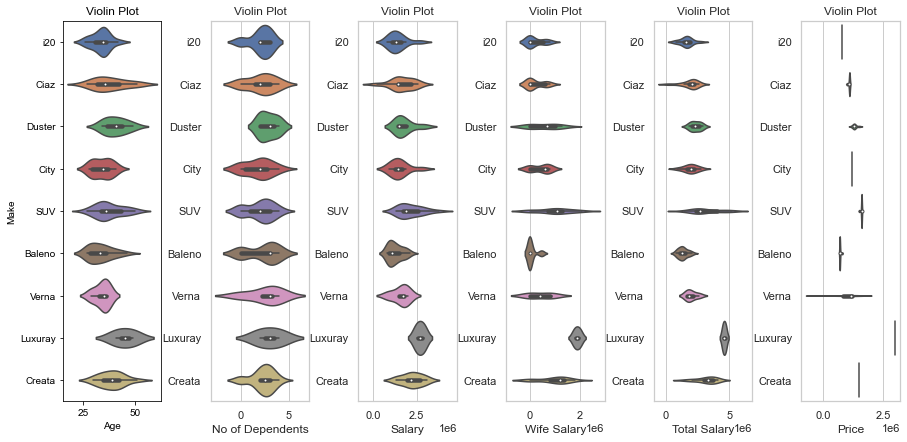

In [49]:
plt.figure(1,figsize=(15,7))
n = 0
for cols in ['Age','No of Dependents','Salary','Wife Salary','Total Salary','Price']:
    n += 1
    plt.subplot(1,6,n)
    sns.set(style = 'whitegrid')
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.violinplot(x= cols, y = 'Make', data=df2)
    plt.ylabel("Make" if n==1 else '')
    plt.title('Violin Plot')

<AxesSubplot:xlabel='Make', ylabel='count'>

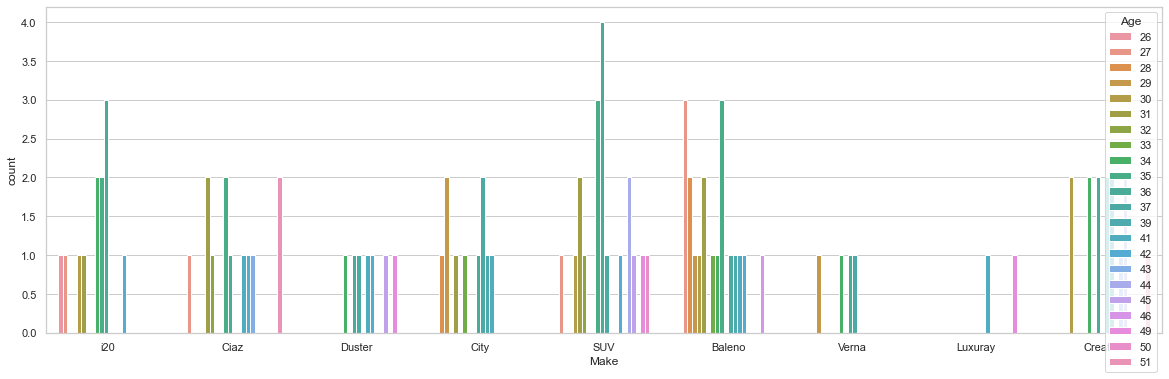

In [50]:
plt.figure(figsize=(20,6))
sns.countplot(x="Make", data=df2, hue="Age")

<AxesSubplot:xlabel='Make', ylabel='count'>

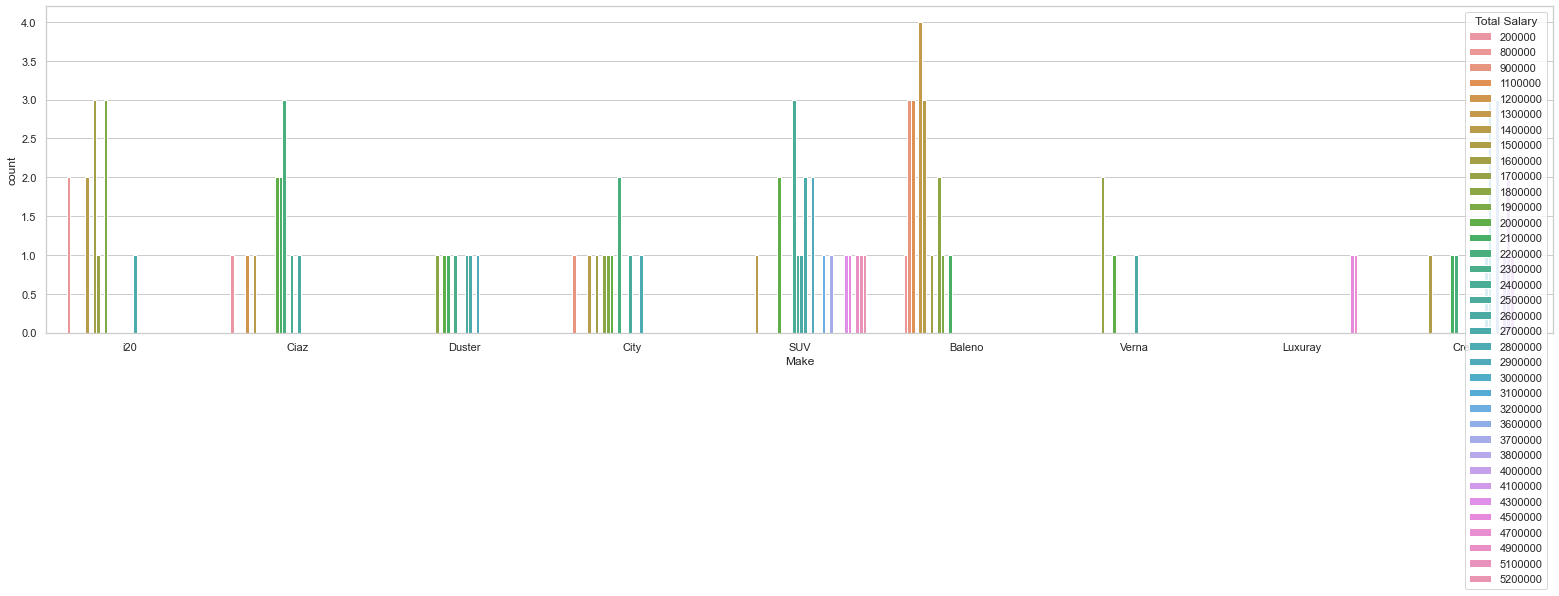

In [51]:
plt.figure(figsize=(27,6))
sns.countplot(x="Make", data=df2, hue="Total Salary")

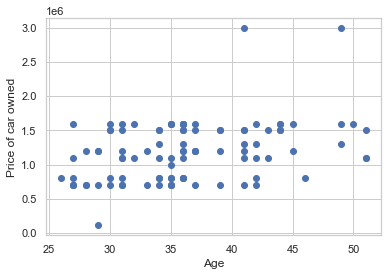

In [52]:
plt.xlabel('Age')
plt.ylabel('Price of car owned')
plt.scatter(df2['Age'],df2['Price'])

Text(8.96, 0.5, 'Price of car owned')

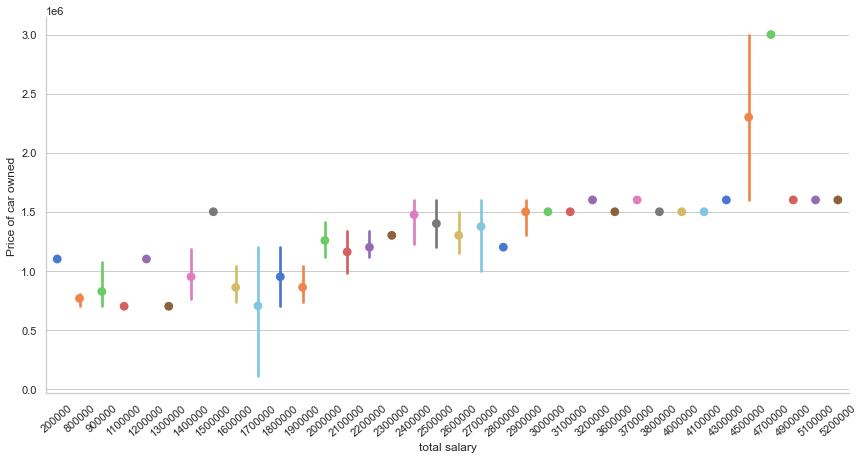

In [53]:
sns.catplot(kind='point', data=df2, x='Total Salary', y='Price', palette='muted', height=6, aspect=2)
plt.tick_params(axis='x', rotation=40)
plt.xlabel('total salary')
plt.ylabel('Price of car owned')

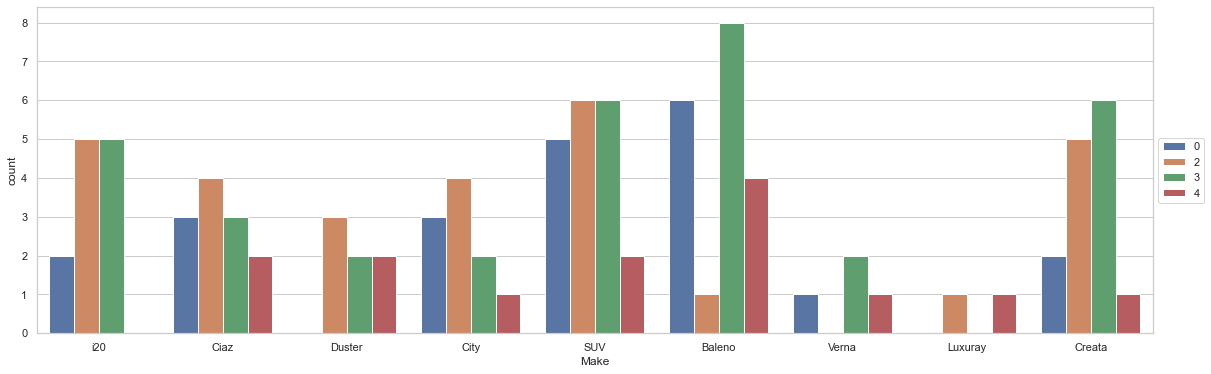

In [54]:
plt.figure(figsize=(20,6))
sns.countplot(x="Make", data=df2, hue="No of Dependents")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

Text(8.96, 0.5, 'Price of car owned')

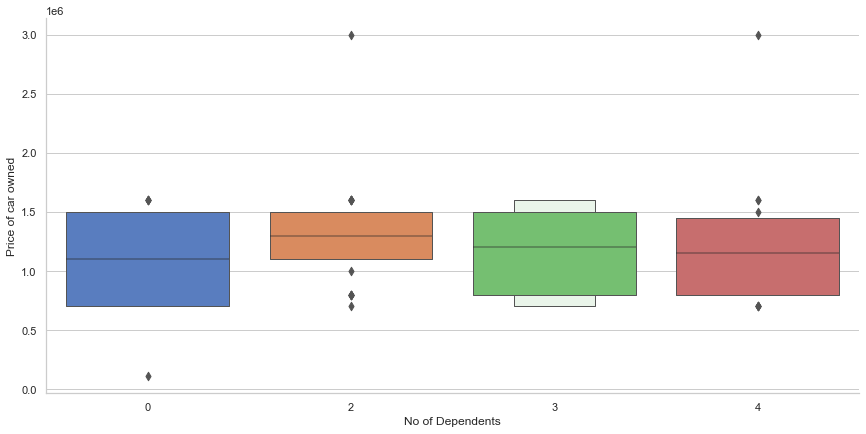

In [55]:
sns.catplot(kind='boxen', data=df2, x='No of Dependents', y='Price', palette='muted', height=6, aspect=2)
plt.xlabel('No of Dependents')
plt.ylabel('Price of car owned')

<AxesSubplot:xlabel='Make', ylabel='count'>

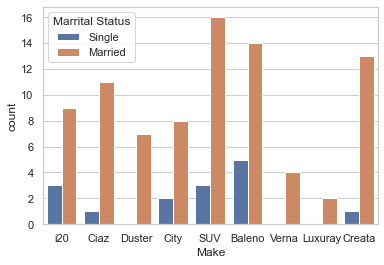

In [56]:
sns.countplot(x="Make", data=df2, hue="Marrital Status")

Text(0, 0.5, 'Price of car owned')

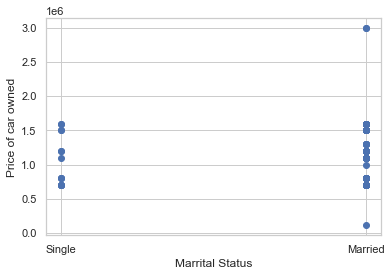

In [57]:
plt.scatter(df2['Marrital Status'],df2['Price'])
plt.xlabel('Marrital Status')
plt.ylabel('Price of car owned')

Text(0.5, 0, 'Car')

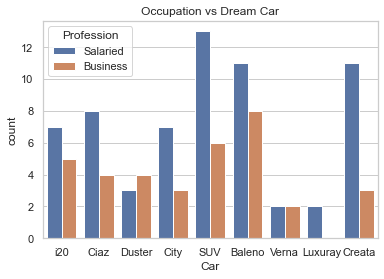

In [58]:
sns.countplot(x="Make", data=df2, hue="Profession")
plt.title("Occupation vs Dream Car")
plt.xlabel("Car")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Profession', ylabel='Price'>

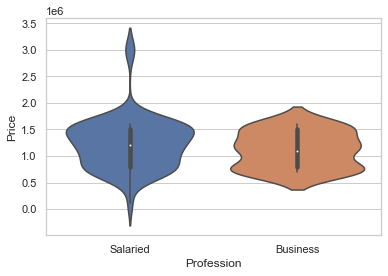

In [59]:
plt.xlabel('Profession')
plt.ylabel('Price of car owned')
sns.violinplot(df2['Profession'],df2['Price'])

Text(0.5, 0, 'Car')

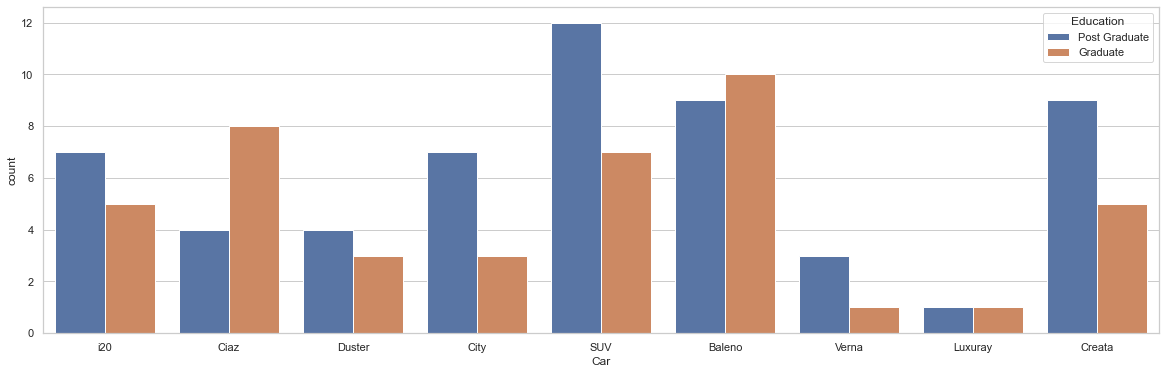

In [60]:
plt.figure(figsize=(20,6))
sns.countplot(x="Make", data=df2, hue="Education")
plt.xlabel("Car")

Text(0.5, 0, 'Car')

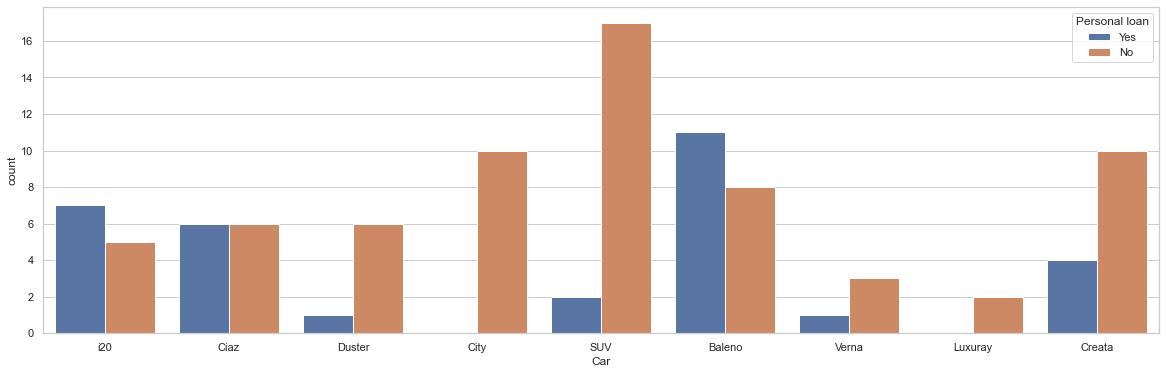

In [61]:
plt.figure(figsize=(20,6))
sns.countplot(x="Make", data=df2, hue="Personal loan")
plt.xlabel("Car")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

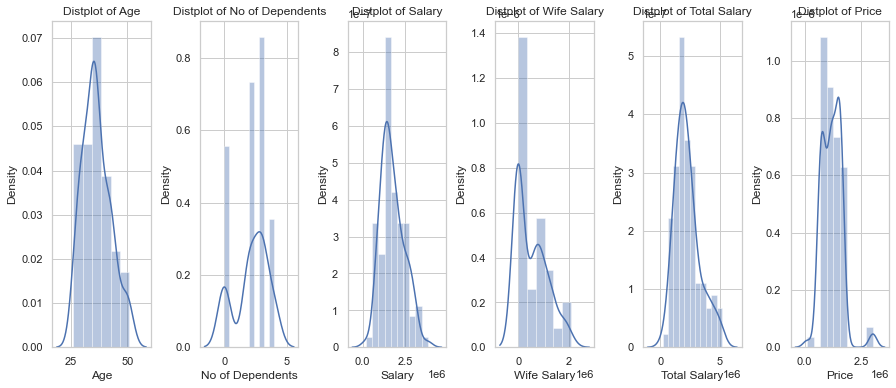

In [62]:
# Plotting for int64 dtype columns
plt.figure(1, figsize=(15,6))
n=0
for x in ['Age', 'No of Dependents' ,'Salary'  ,'Wife Salary'  ,'Total Salary'  ,'Price']:
    n += 1
    plt.subplot(1,6,n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.distplot(df2[x])
    plt.title('Distplot of {}'.format(x))
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

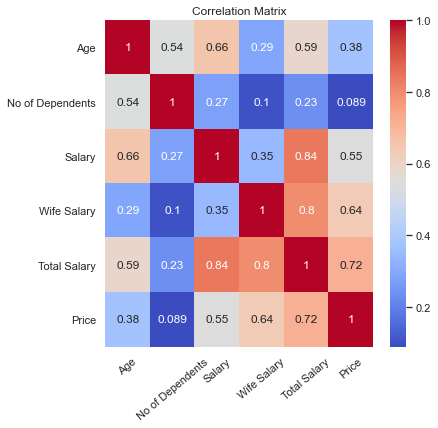

In [63]:
plt.figure(figsize=(6,6))
sns.heatmap(data=df2.corr(), annot=True, cmap='coolwarm')
plt.tick_params(axis='x', rotation=40)
plt.title('Correlation Matrix')

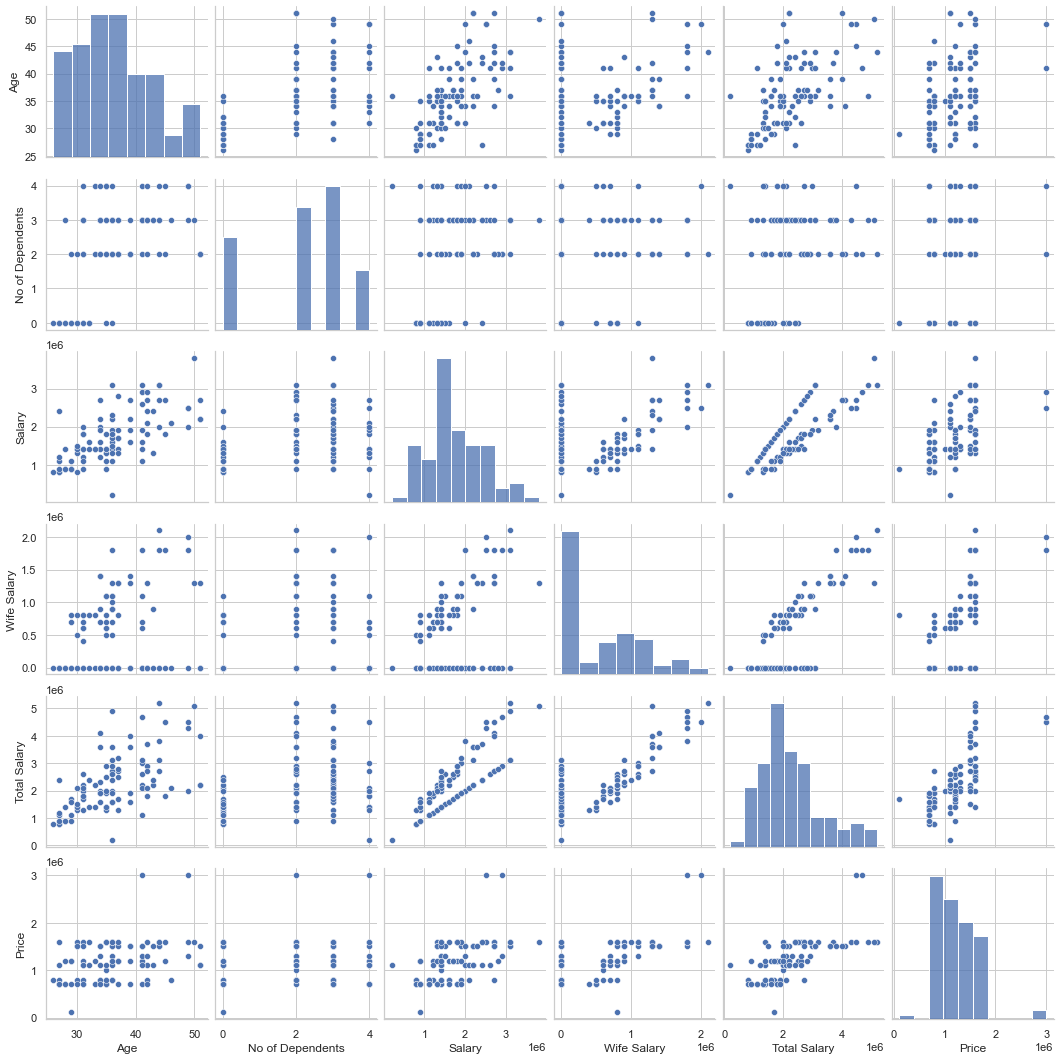

In [64]:
# pair plt
sns.pairplot(df2)

In [65]:
# model deployment
X = df2.iloc[:,df2.columns!='Make']
X.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,1600000


In [66]:
encoding = {"Profession":{"Salaried": 0, "Business": 1},
            "Marrital Status":{"Single": 0, "Married": 1},
            "Education":{"Graduate": 0, "Post Graduate": 1},
            "Personal loan":{"No": 0, "Yes": 1},
            "House Loan":{"No": 0, "Yes": 1},
            "Wife Working":{"No": 0, "Yes": 1}
            }

In [67]:
obj_df = X.replace(encoding)
df_x=obj_df.iloc[:, :13]
df_x.isna().sum()
obj_df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Price
0,27,0,0,1,0,1,0,0,800000,0,800000,800000
1,35,0,1,1,2,1,1,1,1400000,600000,2000000,1000000
2,45,1,1,0,4,1,1,0,1800000,0,1800000,1200000
3,41,1,1,1,3,0,0,1,1600000,600000,2200000,1200000
4,31,0,1,1,2,1,0,1,1800000,800000,2600000,1600000


In [68]:
df_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Age               99 non-null     int64
 1   Profession        99 non-null     int64
 2   Marrital Status   99 non-null     int64
 3   Education         99 non-null     int64
 4   No of Dependents  99 non-null     int64
 5   Personal loan     99 non-null     int64
 6   House Loan        99 non-null     int64
 7   Wife Working      99 non-null     int64
 8   Salary            99 non-null     int64
 9   Wife Salary       99 non-null     int64
 10  Total Salary      99 non-null     int64
 11  Price             99 non-null     int64
dtypes: int64(12)
memory usage: 9.4 KB


In [69]:
# k-means 
X_scaled = StandardScaler().fit_transform(obj_df)
X_scaled = pd.DataFrame(X_scaled,columns=['Age', 'Profession', 'Marrital Status', 'Education', 'No of Dependents',
                                          'Personal loan', 'House Loan', 'Wife Working', 'Salary', 'Wife Salary',
                                          'Total Salary','Price'])
x = X_scaled.to_numpy()
X_scaled

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Price
0,-1.498630,-0.739510,-2.366432,0.876275,-1.642313,1.446980,-0.772512,-1.051847,-1.397118,-0.887055,-1.406760,-0.904843
1,-0.211304,-0.739510,0.422577,0.876275,-0.136859,1.446980,1.294479,0.950708,-0.501877,0.108995,-0.258937,-0.445579
2,1.397855,1.352247,0.422577,-1.141195,1.368594,1.446980,1.294479,-1.051847,0.094950,-0.887055,-0.450240,0.013685
3,0.754191,1.352247,0.422577,0.876275,0.615867,-0.691095,-0.772512,0.950708,-0.203464,0.108995,-0.067633,0.013685
4,-0.854967,-0.739510,0.422577,0.876275,-0.136859,1.446980,-0.772512,0.950708,0.094950,0.441012,0.314975,0.932213
...,...,...,...,...,...,...,...,...,...,...,...,...
94,-1.498630,1.352247,-2.366432,-1.141195,-1.642313,-0.691095,-0.772512,-1.051847,0.990190,-0.887055,0.123671,0.932213
95,2.202434,-0.739510,0.422577,0.876275,0.615867,-0.691095,-0.772512,0.950708,3.079085,1.271054,2.706274,0.932213
96,2.363350,1.352247,0.422577,-1.141195,-0.136859,1.446980,1.294479,-1.051847,0.691777,-0.887055,-0.067633,-0.215947
97,2.363350,-0.739510,0.422577,0.876275,-0.136859,-0.691095,-0.772512,0.950708,1.437811,1.271054,1.654102,0.702581


In [70]:
wcss = []

for i in range(2, 9):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10,random_state = 1234)
    kmeans.fit(df_x)
    wcss.append(kmeans.inertia_)

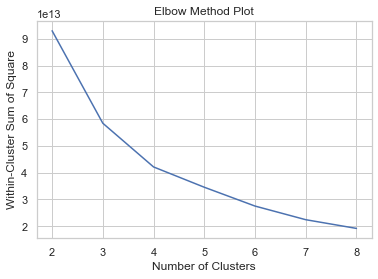

In [71]:
plt.plot(range(2, 9), wcss)
plt.title('Elbow Method Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Square') # Within cluster sum of squares
plt.show()

In [72]:
# training the model using k=4 as rendered by the above plot
kmean = KMeans(n_clusters=4, init='k-means++', random_state=1234)
kmean.fit(df_x)

KMeans(n_clusters=4, random_state=1234)

In [73]:
# check the labels assigned to each data point
print(kmean.labels_)

[2 1 0 1 1 2 2 2 0 2 1 2 2 2 2 3 2 2 2 2 1 2 1 2 1 1 2 2 1 1 2 1 1 1 0 3 2
 1 2 1 2 2 1 1 2 3 2 1 2 1 0 3 0 3 3 0 0 2 2 2 2 2 0 2 1 2 3 0 3 2 1 1 2 1
 1 3 0 1 0 3 0 3 0 0 0 2 2 1 3 0 2 3 0 2 0 3 0 3 0]


In [74]:
# check the size of clusters
pd.Series(kmean.labels_).value_counts()

2    38
1    26
0    20
3    15
dtype: int64

In [75]:
# adding a new feature of cluster labels to the dataset 2
df2['clusters'] = kmean.labels_

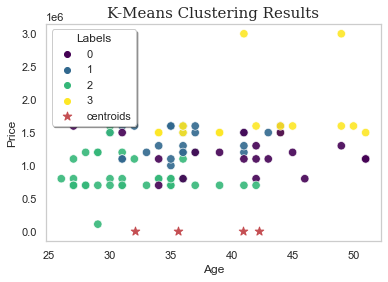

In [99]:
# visualizing clusters
sns.scatterplot(data=df2, x='Age', y='Price', s=70, hue=kmean.labels_, palette='viridis', zorder=2, alpha=.9)
plt.scatter(x=kmean.cluster_centers_[:, 0], y=kmean.cluster_centers_[:, 1], marker="*", c="r", s=80, label="centroids")
plt.xlabel('Age')
plt.ylabel('Price')
plt.grid()
plt.tick_params(grid_color='lightgray', grid_linestyle='-', zorder=1)
plt.legend(title='Labels', fancybox=True, shadow=True)
plt.title('K-Means Clustering Results')
plt.show()

In [105]:
#Feature selection for performance data
x_performance = df_x[['Age', 'Profession', 'Marrital Status', 'No of Dependents', 'Total Salary', 'Personal loan']]
Y_performance = df_x[ 'Price']

# Split the performance data into training and testing sets
x_performance_train, x_performance_test, Y_performance_train, Y_performance_test = train_test_split(x_performance, Y_performance, test_size=0.2, random_state=42)


In [106]:
# Train a Linear Regression model on performance data
linear_model_perf = LinearRegression()
linear_model_perf.fit(x_performance_train, Y_performance_train)

LinearRegression()

In [107]:
Y_performance_pred_linear = linear_model_perf.predict(x_performance_test)
performance_mse_linear = mean_squared_error(Y_performance_test, Y_performance_pred_linear)
print('Performance Linear Regression Model Mean Squared Error:', performance_mse_linear)


Performance Linear Regression Model Mean Squared Error: 124616996506.98792


In [108]:
# Train a Decision Tree Regressor on performance data
decision_tree_model_perf = DecisionTreeRegressor(random_state=42)
decision_tree_model_perf.fit(x_performance_train, Y_performance_train)

DecisionTreeRegressor(random_state=42)

In [109]:
# Model evaluation for performance data - Decision Tree
Y_performance_pred_dt = decision_tree_model_perf.predict(x_performance_test)
performance_mse_dt = mean_squared_error(Y_performance_test, Y_performance_pred_dt)
print('Performance Decision Tree Model Mean Squared Error:', performance_mse_dt)

Performance Decision Tree Model Mean Squared Error: 165905000000.0


In [110]:
# Train a Random Forest Regressor on performance data
random_forest_model_perf = RandomForestRegressor(random_state=42)
random_forest_model_perf.fit(x_performance_train, Y_performance_train)

RandomForestRegressor(random_state=42)

In [111]:
# Model evaluation for performance data - Random Forest
Y_performance_pred_rf = random_forest_model_perf.predict(x_performance_test)
performance_mse_rf = mean_squared_error(Y_performance_test, Y_performance_pred_rf)
print('Performance Random Forest Model Mean Squared Error:', performance_mse_rf)

Performance Random Forest Model Mean Squared Error: 154374350000.0


In [112]:
knn = KNeighborsClassifier()
rfc = RandomForestClassifier()
svc = SVC()
dt_clf=DecisionTreeClassifier()
nb_clf=GaussianNB()

  
# making predictions on the training set
for clf in (rfc, knn, svc,dt_clf,nb_clf):
    clf.fit(x_performance_train, Y_performance_train)
    Y_pred = clf.predict(x_performance_train)
    print("Accuracy score of ", clf.__class__.__name__, "=",100*metrics.accuracy_score(Y_performance_train, Y_pred))

Accuracy score of  RandomForestClassifier = 100.0
Accuracy score of  KNeighborsClassifier = 53.16455696202531
Accuracy score of  SVC = 44.303797468354425
Accuracy score of  DecisionTreeClassifier = 100.0
Accuracy score of  GaussianNB = 44.303797468354425


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [235]:
for clf in (rfc, knn, svc,dt_clf,nb_clf):
    clf.fit(x_performance_train, Y_performance_train)
    Y_pred = clf.predict(x_performance_test)
    print("Accuracy score of ", clf.__class__.__name__,"=", 100*metrics.accuracy_score(Y_performance_test, Y_pred))
    print(confusion_matrix(Y_performance_test, Y_pred))
    print(classification_report(Y_performance_test, Y_pred))

Accuracy score of  RandomForestClassifier = 20.0
[[0 0 0 0 0 1 0 0 0]
 [0 1 0 0 0 0 0 0 0]
 [0 3 1 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0]
 [0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 1]
 [0 0 0 0 0 0 0 1 2]
 [0 0 0 1 3 1 0 0 1]]
              precision    recall  f1-score   support

      110000       0.00      0.00      0.00         1
      700000       0.20      1.00      0.33         1
      800000       1.00      0.20      0.33         5
     1000000       0.00      0.00      0.00         0
     1100000       0.00      0.00      0.00         1
     1200000       0.00      0.00      0.00         1
     1300000       0.00      0.00      0.00         2
     1500000       1.00      0.33      0.50         3
     1600000       0.25      0.17      0.20         6

    accuracy                           0.20        20
   macro avg       0.27      0.19      0.15        20
weighted avg       0.48      0.20      0.24        20

Accuracy score of  KNeighborsClassifier = 30.0
[[0 0 0 0

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken wil

# Dataset - 3 (EV Stats)

In [181]:
df3=pd.read_csv('EV Stats.csv')

In [182]:
df3.head()

,Sl. No,State,Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,Two Wheelers (Category L2 (CMVR)),Two Wheelers (Max power not exceeding 250 Watts),Three Wheelers (Category L5 slow speed as per CMVR),Three Wheelers (Category L5 as per CMVR),Passenger Cars (Category M1 as per CMVR),Buses,Total in state
0,1,Andhra Pradesh,431,692,4689,0,0,3680,0,9492
1,2,Assam,463,138,1006,0,117,151,0,1875
2,3,Bihar,252,430,2148,6,64,271,0,3171
3,4,Chhattisgarh,613,382,2078,58,106,997,0,4234
4,5,Delhi,1395,251,5018,0,1,12695,21,19381


In [183]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 10 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Sl. No                                                              31 non-null     int64 
 1   State                                                               31 non-null     object
 2   Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules  31 non-null     int64 
 3   Two Wheelers (Category L2 (CMVR))                                   31 non-null     int64 
 4   Two Wheelers (Max power not exceeding 250 Watts)                    31 non-null     int64 
 5   Three Wheelers (Category L5 slow speed as per CMVR)                 31 non-null     int64 
 6   Three Wheelers (Category L5 as per CMVR)                            31 non-null     int64 
 7   Passenger Cars (Category M1 

In [184]:
df3.describe()

,Sl. No,Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,Two Wheelers (Category L2 (CMVR)),Two Wheelers (Max power not exceeding 250 Watts),Three Wheelers (Category L5 slow speed as per CMVR),Three Wheelers (Category L5 as per CMVR),Passenger Cars (Category M1 as per CMVR),Buses,Total in state
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,16.000000,1777.354839,907.677419,7260.516129,25.096774,46.451613,6811.032258,1.741935,16829.870968
std,9.092121,5000.160994,2518.917378,20008.445495,73.990700,131.491150,18941.726543,6.016465,46327.212405
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,6.000000
25%,8.500000,22.000000,19.000000,94.000000,0.000000,0.000000,236.500000,0.000000,665.000000
50%,16.000000,463.000000,228.000000,2148.000000,0.000000,1.000000,997.000000,0.000000,4234.000000
75%,23.500000,1089.500000,767.500000,6639.000000,7.000000,37.500000,5487.500000,0.000000,14951.500000
max,31.000000,27549.000000,14069.000000,112538.000000,389.000000,720.000000,105571.000000,27.000000,260863.000000


In [185]:
df3.isnull().sum()

Sl. No                                                                0
State                                                                 0
Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules    0
Two Wheelers (Category L2 (CMVR))                                     0
Two Wheelers (Max power not exceeding 250 Watts)                      0
Three Wheelers (Category L5 slow speed as per CMVR)                   0
Three Wheelers (Category L5 as per CMVR)                              0
Passenger Cars (Category M1 as per CMVR)                              0
Buses                                                                 0
Total in state                                                        0
dtype: int64

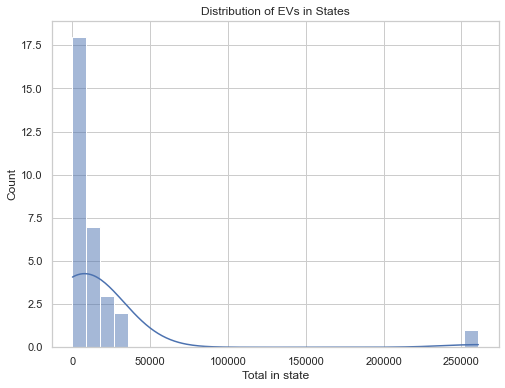

In [186]:
# Visualize the distribution of the target variable (Total in state)
plt.figure(figsize=(8, 6))
sns.histplot(data=df3, x='Total in state', kde=True)
plt.xlabel('Total in state')
plt.ylabel('Count')
plt.title('Distribution of EVs in States')
plt.show()

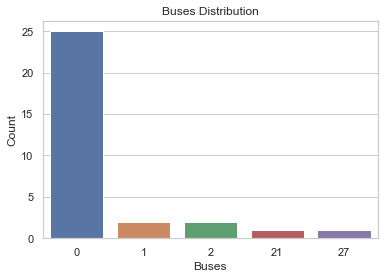

In [187]:
# Bar plot of Buses distribution
sns.countplot(data=df3, x='Buses')
plt.xlabel('Buses')
plt.ylabel('Count')
plt.title('Buses Distribution')
plt.show()

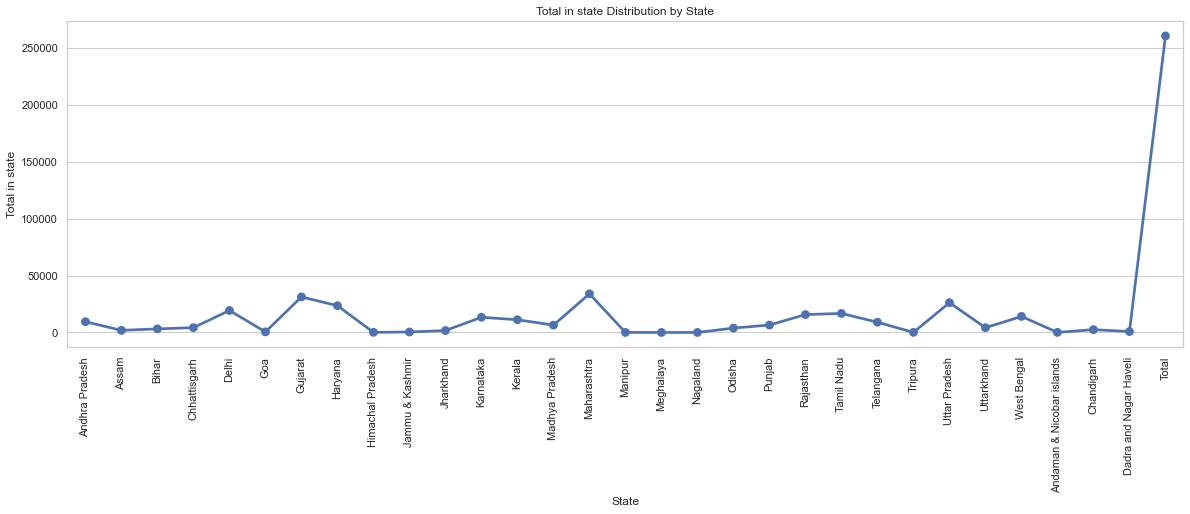

In [188]:
# point plot of Total in state by State
plt.figure(figsize=(20,6))
sns.pointplot(data=df3, x='State', y='Total in state')
plt.xlabel('State')
plt.ylabel('Total in state')
plt.title('Total in state Distribution by State')
plt.xticks(rotation=90)
plt.show()

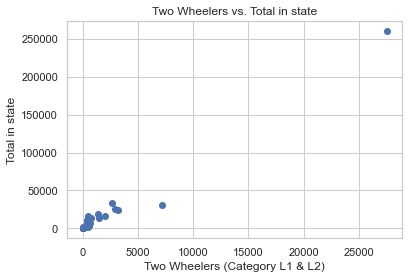

In [189]:
# Scatter plot of Two Wheelers (Category L1 & L2) vs. Total in state
plt.scatter(df3['Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules'], df3['Total in state'])
plt.xlabel('Two Wheelers (Category L1 & L2)')
plt.ylabel('Total in state')
plt.title('Two Wheelers vs. Total in state')
plt.show()

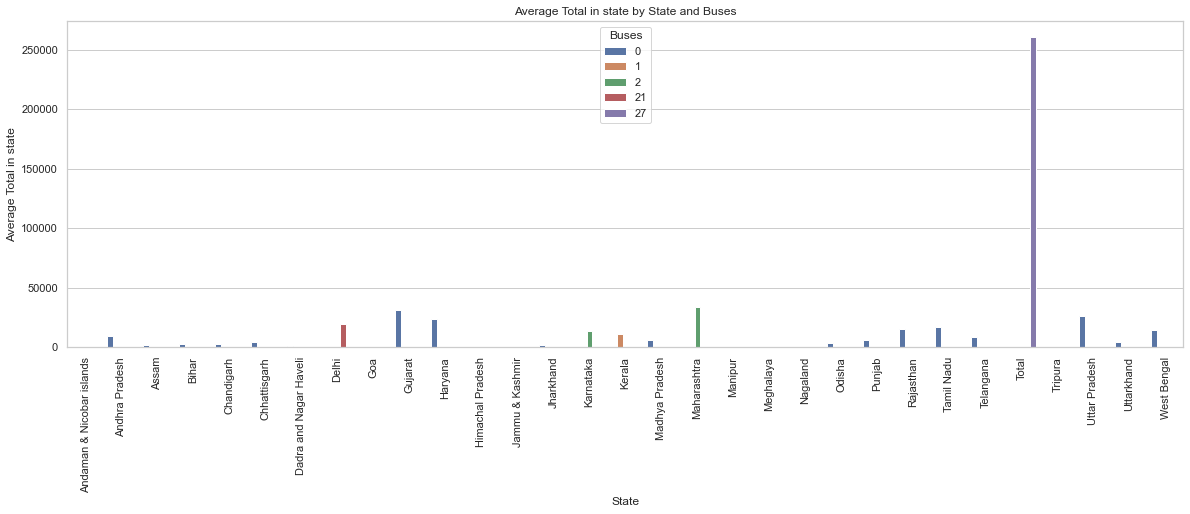

In [190]:
# Grouped bar plot of Total in state by State and Buses
grouped_data = df3.groupby(['State', 'Buses'])['Total in state'].mean().reset_index()
plt.figure(figsize=(20,6))
sns.barplot(data=grouped_data, x='State', y='Total in state', hue='Buses')
plt.xlabel('State')
plt.ylabel('Average Total in state')
plt.title('Average Total in state by State and Buses')
plt.xticks(rotation=90)
plt.show()

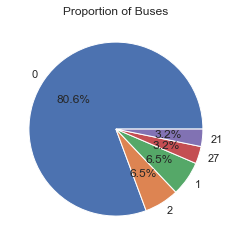

In [191]:
# Pie chart of Buses
buses_counts = df3['Buses'].value_counts()
plt.pie(buses_counts, labels=buses_counts.index, autopct='%1.1f%%')
plt.title('Proportion of Buses')
plt.show()

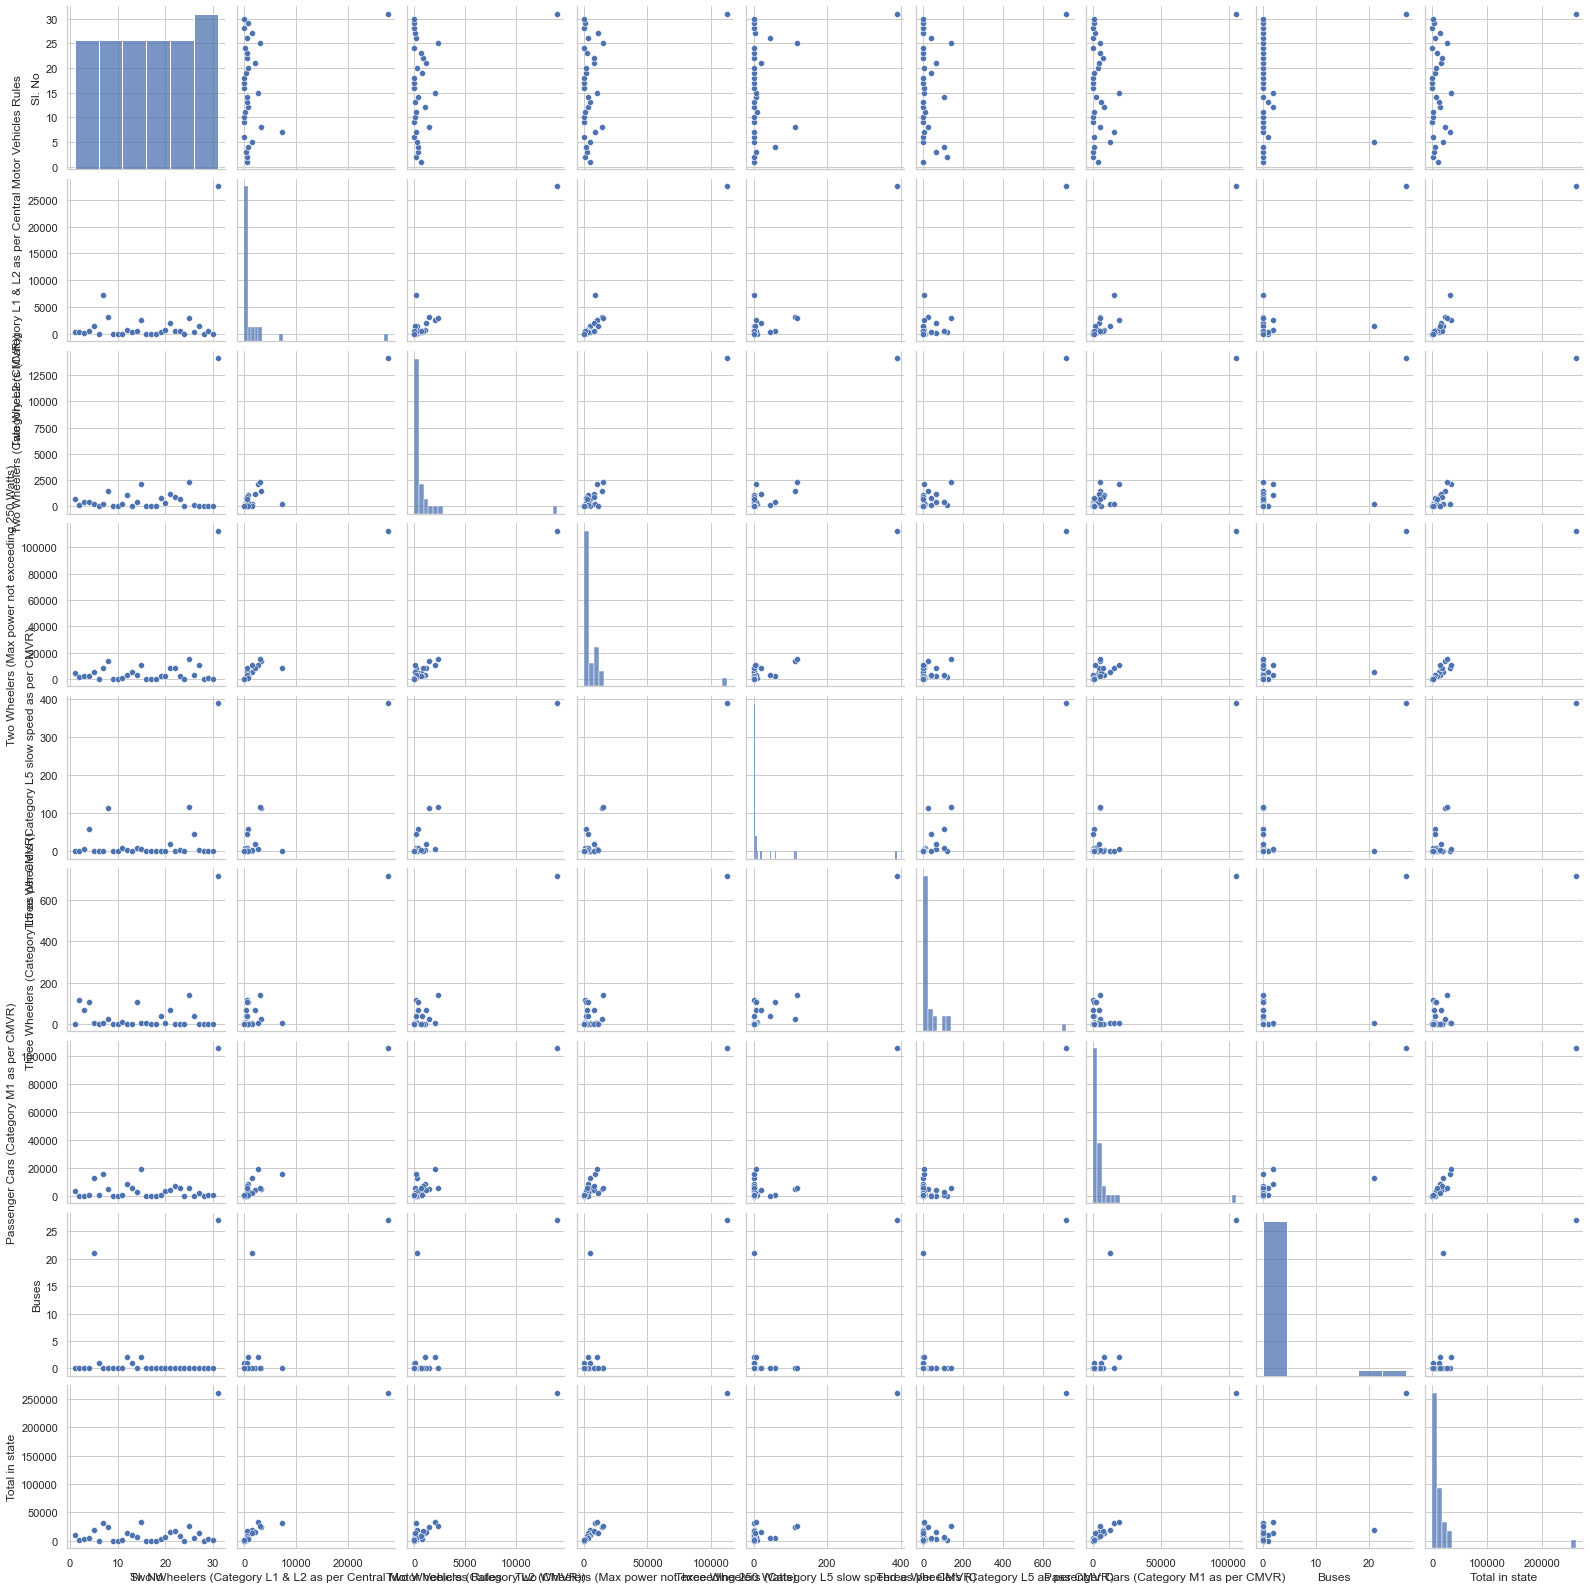

In [192]:
sns.pairplot(df3)

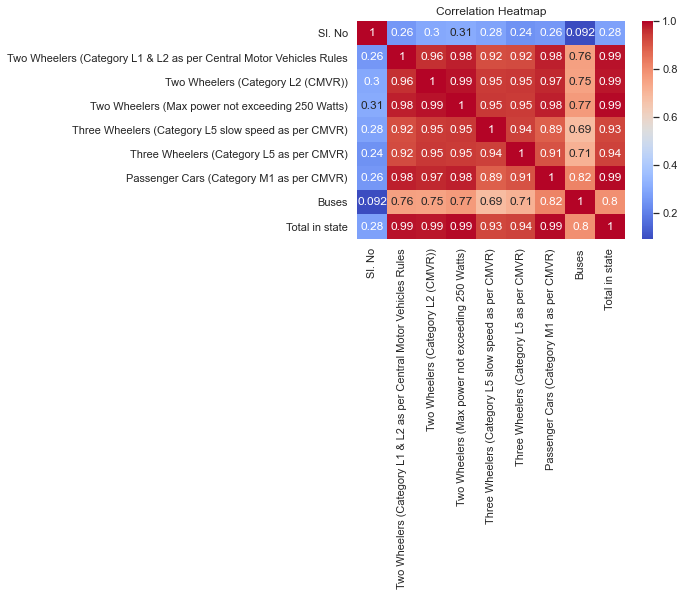

In [193]:
# correlation
sns.heatmap(df3.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [223]:
a = df3[['Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules',
                   'Two Wheelers (Category L2 (CMVR))',
                   'Two Wheelers (Max power not exceeding 250 Watts)',
                   'Three Wheelers (Category L5 slow speed as per CMVR)',
                   'Three Wheelers (Category L5 as per CMVR)',
                   'Passenger Cars (Category M1 as per CMVR)',
                   'Buses']]
b = df3['Total in state']

# Split the data into training and testing sets
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.2, random_state=42)

# Train a linear regression model
linear_model = LinearRegression()
linear_model.fit(a_train, b_train)

# Make predictions on the test set
b_pred = linear_model.predict(a_test)

# Evaluate the model using mean squared error (MSE)
mse = mean_squared_error(b_test, b_pred)
print('Linear Regression Mean Squared Error:', mse)

Linear Regression Mean Squared Error: 1.1710144823512973e-22


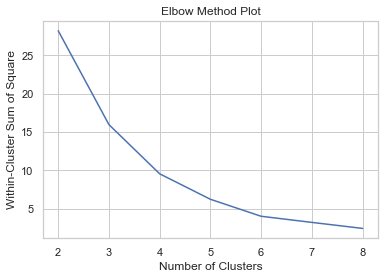

In [198]:
features = ['Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules',
            'Two Wheelers (Category L2 (CMVR))',
            'Two Wheelers (Max power not exceeding 250 Watts)',
            'Three Wheelers (Category L5 slow speed as per CMVR)',
            'Three Wheelers (Category L5 as per CMVR)',
            'Passenger Cars (Category M1 as per CMVR)',
            'Buses']

# Prepare the data for clustering
X = df3[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

wcss = []

for i in range(2, 9):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10,random_state = 1234)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(2, 9), wcss)
plt.title('Elbow Method Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Square') # Within cluster sum of squares
plt.show()

In [220]:
# Perform K-means clustering
k = 4  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

# Get the cluster labels
labels = kmeans.labels_

# Add the cluster labels to the dataset
df3['Cluster'] = labels

In [221]:
kmean.labels_=labels[:31]

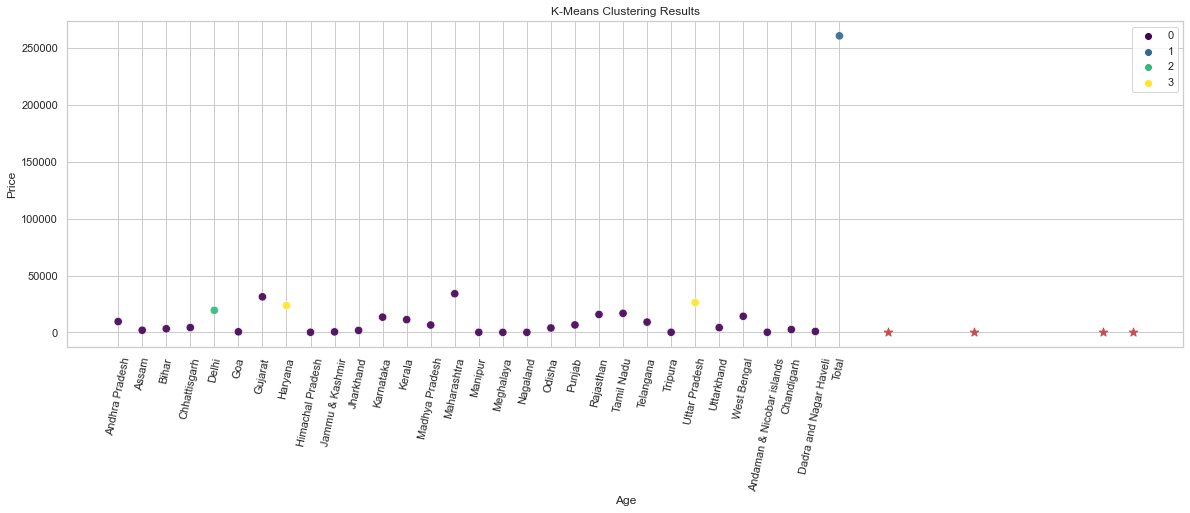

In [222]:
plt.figure(figsize=(20,6))
sns.scatterplot(data=df3, x='State', y='Total in state', s=70, hue=kmean.labels_, palette='viridis', zorder=2, alpha=.9)
plt.scatter(x=kmean.cluster_centers_[:, 0], y=kmean.cluster_centers_[:, 1], marker="*", c="r", s=80, label="centroids")
plt.xlabel('Age')
plt.xticks(rotation=78)
plt.ylabel('Price')
plt.title('K-Means Clustering Results')
plt.show()

In [225]:
# Train a Decision Tree Regressor on performance data
decision_tree_model_perf = DecisionTreeRegressor(random_state=42)
decision_tree_model_perf.fit(a_train, b_train)

DecisionTreeRegressor(random_state=42)

In [226]:
# Model evaluation for performance data - Decision Tree
b_pred_dt = decision_tree_model_perf.predict(a_test)
performance_mse_dt = mean_squared_error(b_test, b_pred_dt)
print('Performance Decision Tree Model Mean Squared Error:', performance_mse_dt)

Performance Decision Tree Model Mean Squared Error: 123575.57142857143


In [227]:
# Train a Random Forest Regressor on performance data
random_forest_model_perf = RandomForestRegressor(random_state=42)
random_forest_model_perf.fit(a_train, b_train)

RandomForestRegressor(random_state=42)

In [228]:
# Model evaluation for performance data - Random Forest
b_pred_rf = random_forest_model_perf.predict(a_test)
performance_mse_rf = mean_squared_error(b_test, b_pred_rf)
print('Performance Random Forest Model Mean Squared Error:', performance_mse_rf)

Performance Random Forest Model Mean Squared Error: 222421.6000285714


In [234]:
knn = KNeighborsClassifier()
rfc = RandomForestClassifier()
svc = SVC()
dt_clf=DecisionTreeClassifier()
nb_clf=GaussianNB()

  
# making predictions on the training set
for clf in (rfc, knn, svc,dt_clf,nb_clf):
    clf.fit(a_train, b_train)
    b_pred = clf.predict(a_train)
    print("Accuracy score of ", clf.__class__.__name__, "=",100*metrics.accuracy_score(b_train, b_pred))

Accuracy score of  RandomForestClassifier = 100.0
Accuracy score of  KNeighborsClassifier = 8.333333333333332
Accuracy score of  SVC = 100.0
Accuracy score of  DecisionTreeClassifier = 100.0
Accuracy score of  GaussianNB = 100.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [230]:
for clf in (rfc, knn, svc,dt_clf,nb_clf):
    clf.fit(a_train, b_train)
    b_pred = clf.predict(a_test)
    print("Accuracy score of ", clf.__class__.__name__,"=", 100*metrics.accuracy_score(b_test, b_pred))
    print(confusion_matrix(b_test, b_pred))
    print(classification_report(b_test, b_pred))

Accuracy score of  RandomForestClassifier = 0.0
[[0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0]]
              precision    recall  f1-score   support

           6       0.00      0.00      0.00       0.0
          24       0.00      0.00      0.00       1.0
          52       0.00      0.00      0.00       1.0
          81       0.00      0.00      0.00       1.0
          82       0.00      0.00      0.00       1.0
          98       0.00      0.00      0.00       1.0
         438       0.00      0.00      0.00       1.0
         514       0.00      0.00      0.00       0.0
         816       0.00      0.00      0.00       1.0

    accuracy                           0.00       7.0
   macro avg       0.00      0.00      0.00       7.0
weighted avg       0.00      0.00      0.00       7.0

Accuracy score of  KNeighborsClassifier = 0.0
[[0 0 0 0 0

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken wil